1. Calcular el valor cuadrático medio (RMS) de la señal signals.mat. 
Corresponde a señales de ECG y EMG

Las señales se adquirieron a una tasa de muestreo de 1024 Hz. El registro correspondiente a las señales tal cual se registraron corresponde al campo asRecording de los archivos entregados. Las señales se sometieron a un proceso de filtrado el cual corresponde al campo filtered.

Primero importamos los datos y visualizamos el diccionario

In [2]:
import scipy.io
import numpy as np
from scipy.signal import find_peaks

# Cargar el archivo .mat
mat_data = scipy.io.loadmat('../Data/signals.mat')

# Mostrar las claves del diccionario
print("Claves en el archivo .mat:")
print(mat_data.keys())

# Mostrar una parte de los datos
for key in mat_data:
    print(f"\nDatos en {key}:\n")
    print(mat_data[key][:5])  # Muestra las primeras 5 muestras de cada conjunto de datos

Claves en el archivo .mat:
dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])

Datos en __header__:

b'MATLA'

Datos en __version__:

1.0

Datos en __globals__:

[]

Datos en Fs:

[[1024]]

Datos en ECG_asRecording:

[[3904.31689453 3939.203125   3976.00683594 ... 4366.41064453
  4365.31103516 4370.91796875]]

Datos en ECG_filtered:

[[ 8.87103896e-03  5.62737497e+01  8.57077127e+01 ... -1.20952610e+02
  -1.31734356e+02 -1.32898021e+02]]

Datos en EMG_filtered1:

[[ 17.65905117  19.41391578  18.89666666 ... 242.49414224 220.4135886
  151.5810508 ]]

Datos en EMG_filtered2:

[[  21.1780547   -79.82418538 -133.65960989 ... -384.58994036
  -539.9349533  -772.65519631]]

Datos en EMG_asRecording1:

[[ 908.07531738  903.17706299  896.62982178 ... 1433.91882324
  1416.109375   1352.75012207]]

Datos en EMG_asRecording2:

[[-3109.97558594 -3231.01391602 -3302.34960938 ... -3

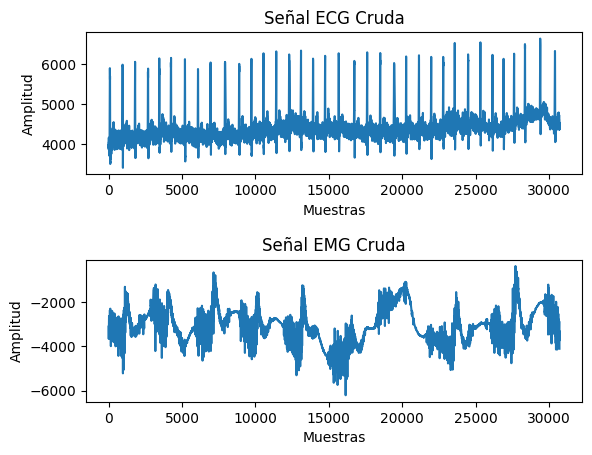

In [3]:
import matplotlib.pyplot as plt

# Cargamos la señal de ECG
senal_ecg = mat_data['ECG_asRecording']
senal_emg = mat_data['EMG_asRecording2']

# Graficamos la señal del ECG y la del EMG
plt.subplot(2,1,1)
plt.plot(senal_ecg[0, :]) 
plt.title('Señal ECG Cruda')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(2,1,2)
plt.plot(senal_emg[0, :])  
plt.title('Señal EMG Cruda')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Ajustamos el espaciado apra que no se superpongan
plt.subplots_adjust(hspace=0.6)

#Visualizamos las señales
plt.show()

In [4]:
# Ahora sí calculamos el valor RMS de las señales
def calcular_rms(signal):
    N = len(signal)  # Número de muestras
    rms = np.sqrt(np.sum(signal**2) / N)  # Fórmula RMS
    return rms

#Encontramos el RMS de la señal de ECG
rms_ecg = calcular_rms(senal_ecg[0, :])  # Suponiendo que tienes una matriz [muestras, canales]
print(f'RMS de la señal ECG: {rms_ecg}')

#Calculamos el RMS de la señal EMG
rms_emg = calcular_rms(senal_emg[0, :])  # Suponiendo que tienes una matriz [muestras, canales]
print(f'\nRMS de la señal EMG: {rms_emg}')

RMS de la señal ECG: 4392.9682937490725

RMS de la señal EMG: 3156.0533120007753


**2. Analísis estadístico: Señales de Electrocardiografía**

In [5]:
# Pasamos cada señal a una varible para poder manejarla
senalECGraw=mat_data['ECG_asRecording'][0]
senalECGfilter=mat_data['ECG_filtered'][0]
senalEMGfilter1=mat_data['EMG_filtered1'][0]
senalEMGfilter2=mat_data['EMG_filtered2'][0]
senalEMGraw1=mat_data['EMG_asRecording1'][0]
senalEMGraw2=mat_data['EMG_asRecording2'][0]
#Extraemos el valor de la frecuencia
frecuencia=mat_data['Fs']
#Con el valor de la frecuencia de los datos podermos generar el vector de tiempo y calcular la duracion de la grafica
freq= frecuencia[0][0]
def vec_tiempo(signal,freq):
    N = len(signal)
    duracion = N / freq
    print(f'Duración: {duracion:.2f} segundos')
    t = np.arange(N) / freq
    return t


Creacion de las señales de tiempo y de las graficas

Duración: 30.00 segundos
Duración: 30.00 segundos


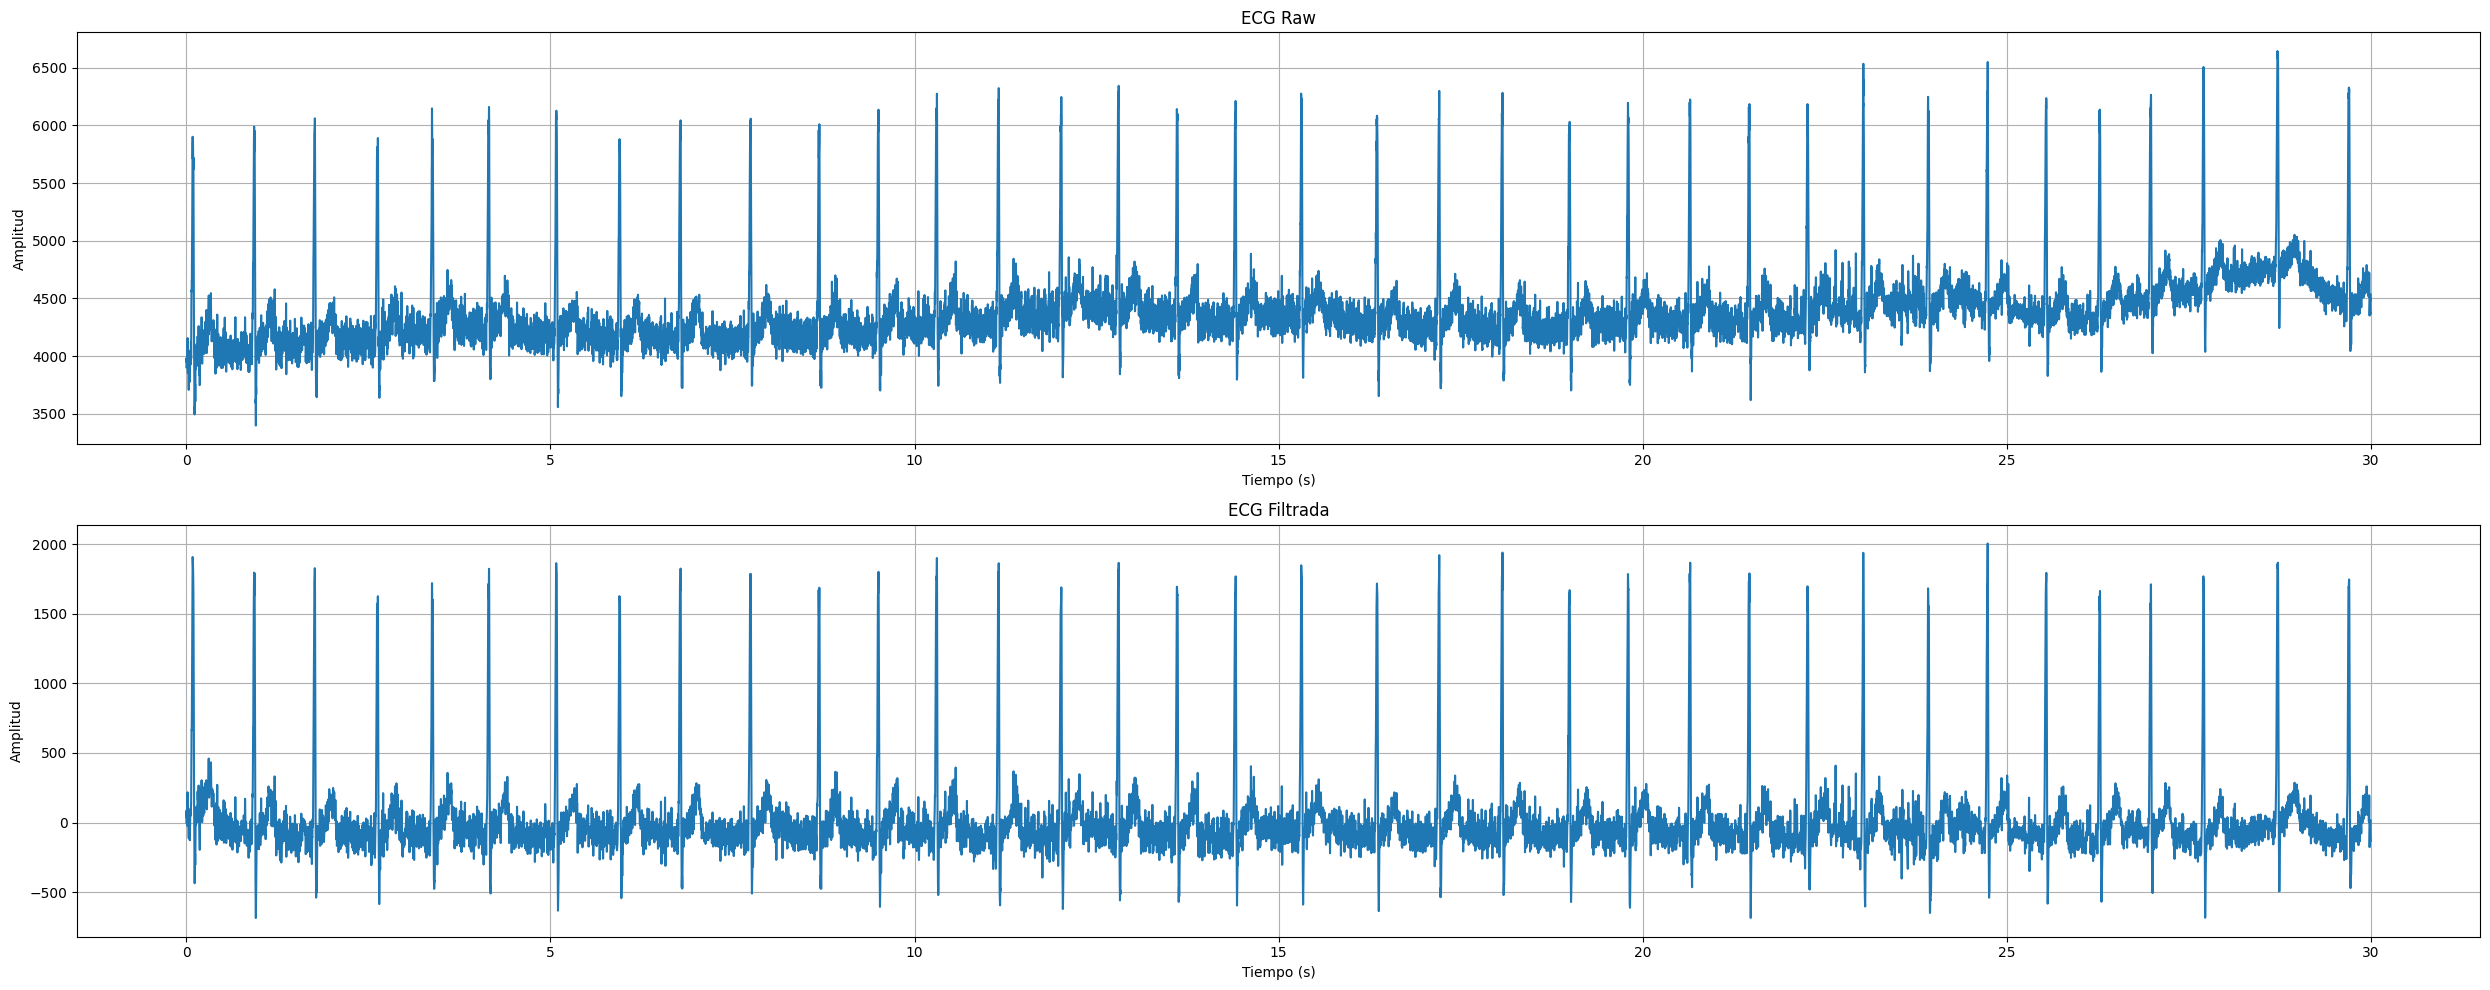

In [6]:
t1 = vec_tiempo(senalECGraw,freq)
t2 = vec_tiempo(senalECGfilter,freq)

# Graficar

plt.figure(figsize=(25,10))

plt.subplot(2, 1, 1)
plt.plot(t1, senalECGraw)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('ECG Raw')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t2, senalECGfilter)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('ECG Filtrada')
plt.grid(True)

plt.tight_layout()
plt.show()


La señal de ECG sin filtrar presenta una línea base inestable y un desplazamiento hacia arriba que dificulta el análisis preciso de su amplitud, aunque esta se encuentra entre 2-3 mV. Tras aplicar filtradoy eliminacion de offset, se corrige la línea base (originalmente con un offset de 4 mV) tambien se eliminan oscilaciones de baja frecuencia, sin afectar la amplitud de la señal. Esto sugiere el uso de un filtro pasa altas (≈0.5 Hz) junto con un filtro pasa bajas (≈40 Hz), para conservar las componentes útiles del ECG y reducir el ruido fisiológico o electromagnético.

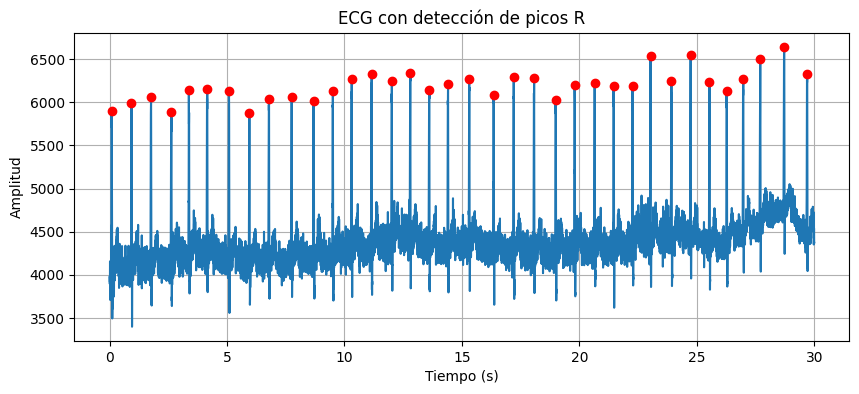

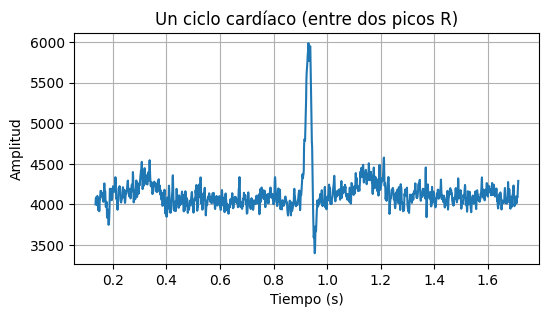

In [7]:
# Detectar picos R
peaks, _ = find_peaks(senalECGraw, distance=freq*0.6, height=0.5)  # Ajusta height y distance

# Tomar un ciclo entre dos picos R
r1 = peaks[0]
r2 = peaks[2]
ciclor = senalECGraw[r1+50:r2-50]
tciclor = t1[r1+50:r2-50]

plt.figure(figsize=(10, 4))
plt.plot(t1, senalECGraw)
plt.plot(t1[peaks], senalECGraw[peaks], 'ro')
plt.title('ECG con detección de picos R')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Graficar ciclo cardíaco extraído
plt.figure(figsize=(6, 3))
plt.plot(tciclor, ciclor)
plt.title('Un ciclo cardíaco (entre dos picos R)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

Se realiza la extraccion de un ciclo cardiaco donde se puede observar el pico R aunque las otras componentes del ciclo cardiaco puede que se pierdan un poco debido al ruido, tambien procedemos a encontrar sus caracteristicas estadisticas.

In [8]:
import numpy as np

promedio = np.mean(ciclor)
rms = np.sqrt(np.mean(ciclor**2))
varianza = np.var(ciclor)
desviacion_std = np.std(ciclor)

print(f"Promedio: {promedio:.4f}")
print(f"Valor RMS: {rms:.4f}")
print(f"Varianza: {varianza:.4f}")
print(f"Desviación estándar: {desviacion_std:.4f}")

Promedio: 4132.5333
Valor RMS: 4138.9921
Varianza: 53424.0135
Desviación estándar: 231.1364


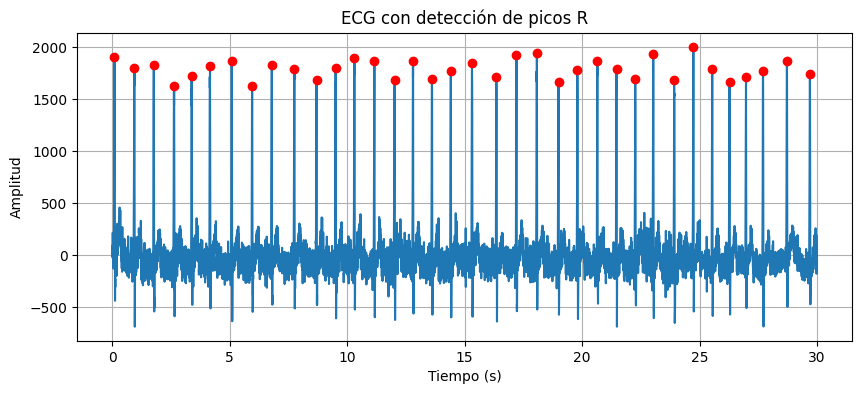

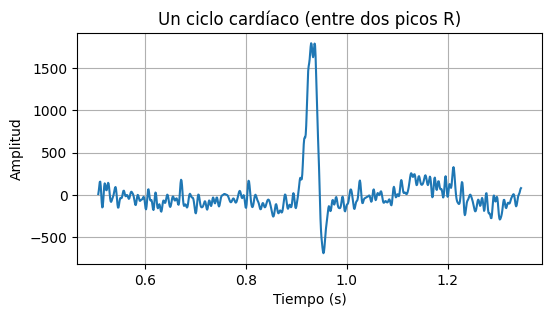

In [9]:
# Detectar picos R
peaks, _ = find_peaks(senalECGfilter, distance=freq*0.6, height=0.4)  # Ajusta height y distance

# Tomar un ciclo entre dos picos R
r= peaks[0]
r1 = int(((peaks[1] - peaks[0])/2)+peaks[0])
r2 = int(((peaks[2] - peaks[1])/2)+peaks[1])
#ciclof = senalECGfilter[r1+50:r2-50]
#tciclof = t2[r1+50:r2-50]

ciclof = senalECGfilter[r1:r2]
tciclof = t2[r1:r2]

plt.figure(figsize=(10, 4))
plt.plot(t1, senalECGfilter)
plt.plot(t1[peaks], senalECGfilter[peaks], 'ro')
plt.title('ECG con detección de picos R')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Graficar ciclo cardíaco extraído
plt.figure(figsize=(6, 3))
plt.plot(tciclof, ciclof)
plt.title('Un ciclo cardíaco (entre dos picos R)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

El ciclo de la señal filtrada se puede apreciar mejor es posible visualizar las ondas R y S, las ondas T y P se pueden perder un poco pero se aprecia un poco la tendencia a su forma, tambien sacamos las propiedades estadisticas de la señal filtrada.

In [10]:
import numpy as np

promedio = np.mean(ciclof)
rms = np.sqrt(np.mean(ciclof**2))
varianza = np.var(ciclof)
desviacion_std = np.std(ciclof)

print(f"Promedio: {promedio:.4f}")
print(f"Valor RMS: {rms:.4f}")
print(f"Varianza: {varianza:.4f}")
print(f"Desviación estándar: {desviacion_std:.4f}")

Promedio: 9.1730
Valor RMS: 290.7665
Varianza: 84461.0240
Desviación estándar: 290.6218


En la señal ECG sin filtrar, se evidencian valores elevados en la media, probablemente debido a su offset que se puede evidenciar los 4mv, lo que aleja la señal de un valor mas estable al cero. Asimismo, el valor RMS, indicador de la energía total, también es alto, reflejando la presencia significativa de ruido o artefactos, ya sea por movimientos, interferencias o actividad fisiológica. Esto también provoca un aumento en la varianza y la desviación estándar, producto de las variaciones del voltaje.

Tras aplicar el filtrado, se reducen tanto el promedio como el RMS, gracias a la eliminación del offset y la corrección de la pendiente en la línea base, además de remover frecuencias fuera del rango útil del ECG (0.5 - 40 Hz). 

Promedio: 1.0683
Varianza: 77634.4791


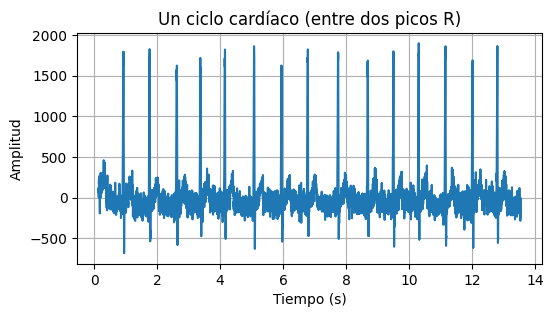

In [11]:
peaks, _ = find_peaks(senalECGfilter, distance=freq*0.6, height=0.4)  # Ajusta height y distance

# Tomar un ciclo entre dos picos R
r1 = peaks[0]
r2 = peaks[16]
ciclof15 = senalECGfilter[r1+50:r2-50]
tciclof15 = t2[r1+50:r2-50]

promedio = np.mean(ciclof15)
varianza = np.var(ciclof15)

print(f"Promedio: {promedio:.4f}")
print(f"Varianza: {varianza:.4f}")

# Graficar ciclo cardíaco extraído
plt.figure(figsize=(6, 3))
plt.plot(tciclof15, ciclof15)
plt.title('Un ciclo cardíaco (entre dos picos R)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

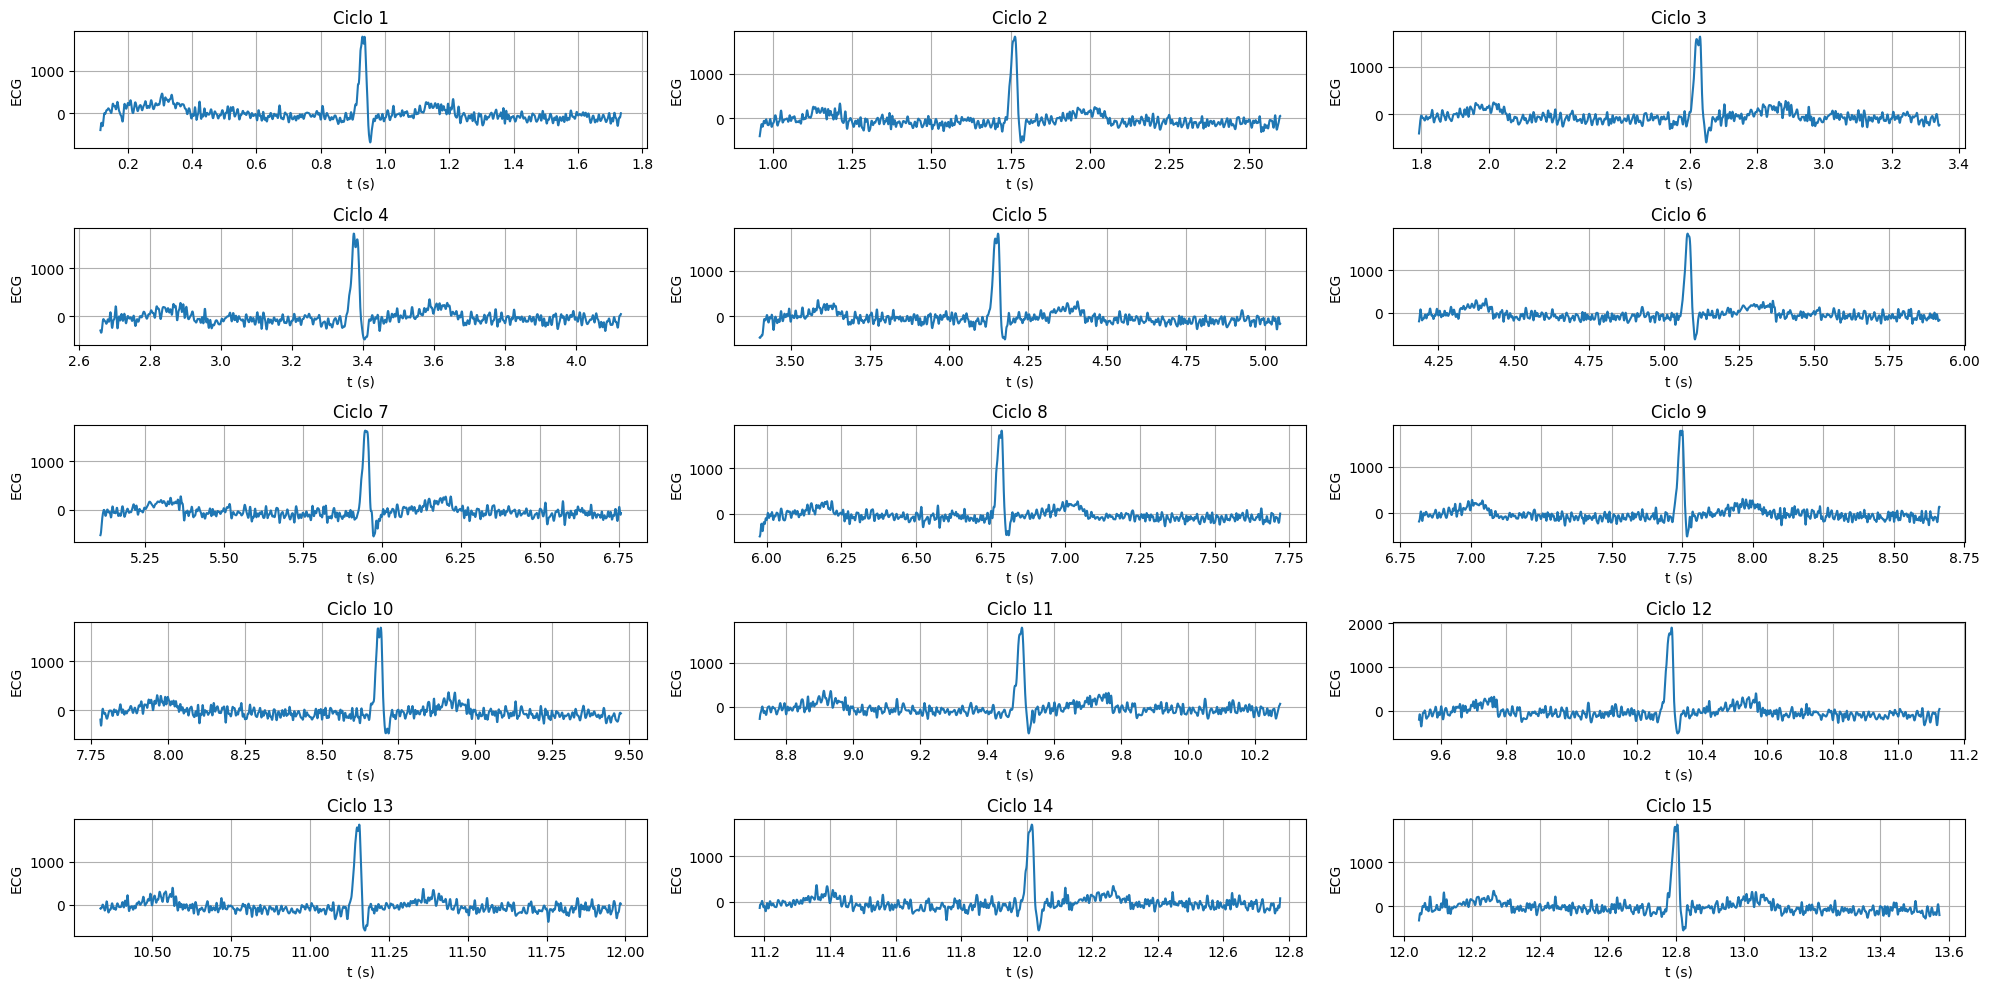

1.06834309865346
77634.47913370274


In [12]:
plt.figure(figsize=(20, 10))
promedios =[]
varianzas =[]
for i in range(15):
    r1 = peaks[i]
    r2 = peaks[i+2]

    ciclo = senalECGfilter[r1+30:r2-30]
    tciclo = t2[r1+30:r2-30]

    promedios.append(np.mean(ciclo))
    varianzas.append(np.var(ciclo))



    plt.subplot(5, 3, i+1)  # 5 filas, 3 columnas
    plt.plot(tciclo, ciclo)
    plt.title(f'Ciclo {i+1}')
    plt.xlabel('t (s)')
    plt.ylabel('ECG')
    plt.grid(True)

plt.tight_layout()
plt.show()

#print(f"Promedio: {promedio:.4f}")
#print(f"Varianza: {varianza:.4f}")
print(promedio)
print(varianza)

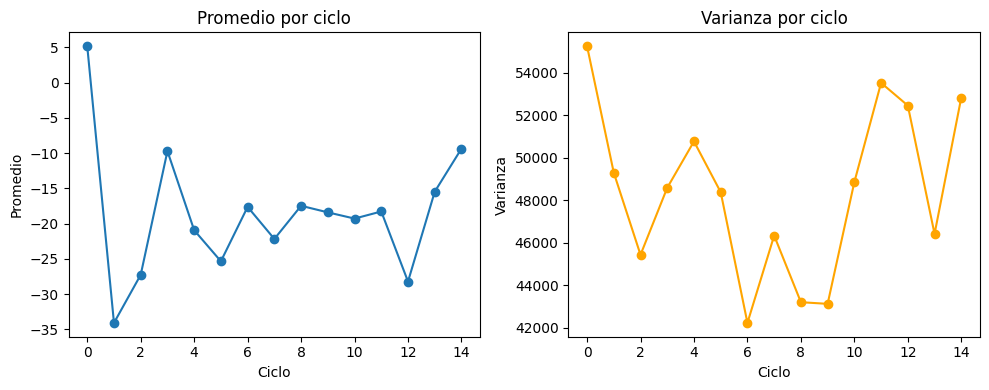

In [13]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(promedios, marker='o')
plt.title('Promedio por ciclo')
plt.xlabel('Ciclo')
plt.ylabel('Promedio')

plt.subplot(1, 2, 2)
plt.plot(varianzas, marker='o', color='orange')
plt.title('Varianza por ciclo')
plt.xlabel('Ciclo')
plt.ylabel('Varianza')

plt.tight_layout()
plt.show()

Visualmente se puede concluir que los ciclos extraidos poseen caracteristicas similares, pero cuando hacemos el analisis por caracteristicas estadisticas vemos que el promedio y varianza por ciclo tienden a ser distintas para cada ciclo, esto significa que no conserva las propiedades estadisticas durante el tiempo por ende no es estacionaria.

In [32]:
#Creacion de los ciclos

r1 = peaks[1]
r2 = peaks[3]

cicloc1 = senalECGfilter[r1:r2]
tcicloc1 = t2[r1:r2]

r3 = peaks[3]
r4 = peaks[5]

cicloc2 = senalECGfilter[r3:r4]
tcicloc2 = t2[r3:r4]

Las librerias que se van a necesitar.

In [33]:
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

In [36]:
#Utilizar la prueba shapiro-wilk para evaluar normalidad

sh1 = shapiro(cicloc1)
sh2 = shapiro(cicloc2)

print("Shapiro ciclo 1:", sh1)
print("Shapiro ciclo 2:", sh2)
sh1.pvalue > 0.05,sh2.pvalue > 0.05

Shapiro ciclo 1: ShapiroResult(statistic=0.5565649994048295, pvalue=9.903965096025948e-55)
Shapiro ciclo 2: ShapiroResult(statistic=0.5821469951203335, pvalue=1.1757807829732768e-51)


(False, False)

Como P< 0.05 entonces se considera que la señales no son normales.

In [37]:
lev = levene(cicloc1, cicloc2)
print("Levene:", lev)
lev.pvalue > 0.05

Levene: LeveneResult(statistic=0.1490572547021679, pvalue=0.6994627855882383)


True

Como P< 0.05 no tienen igualdad de varianzas entonces la señal no tienen la propiedad de homocedastidad

In [38]:
if sh1.pvalue > 0.05 and sh2.pvalue > 0.05 and lev.pvalue > 0.05:
    t, p = ttest_ind(cicloc1, cicloc2, equal_var=True)
    print(f"Prueba t: t = {t:.4f}, p = {p:.4f}")
    if p < 0.05:
        print("Hay diferencia significativa entre los ciclos (t-test)")
    else:
        print("No hay diferencia significativa entre los ciclos (t-test)")
else:
    #Si no se cumplen los supuestos, usar prueba U de Mann-Whitney
    u, p = mannwhitneyu(cicloc1, cicloc2, alternative='two-sided')
    print(f"Prueba U de Mann-Whitney: U = {u}, p = {p:.4f}")
    if p < 0.05:
        print("Hay diferencia significativa entre los ciclos (no paramétrica)")
    else:
        print("No hay diferencia significativa entre los ciclos (no paramétrica)")

Prueba U de Mann-Whitney: U = 1205857.0, p = 0.0000
Hay diferencia significativa entre los ciclos (no paramétrica)


In [40]:
r1,r2 = peaks[1],peaks[3]
r3,r4 = peaks[3],peaks[5]

cicloc1,cicloc2 = senalECGfilter[r1:r2],senalECGfilter[r3:r4]
tcicloc1,tcicloc2 = t2[r1:r2],t2[r3:r4]

sh1 = shapiro(cicloc1)
sh2 = shapiro(cicloc2)

print("Shapiro ciclo 1:", sh1)
print("Shapiro ciclo 2:", sh2)

lev = levene(cicloc1, cicloc2)

print("Levene:", lev)

if sh1.pvalue > 0.05 and sh2.pvalue > 0.05 and lev.pvalue > 0.05:
    t, p = ttest_ind(cicloc1, cicloc2, equal_var=True)
    print(f"Prueba t: t = {t:.4f}, p = {p:.4f}")
    if p < 0.05:
        print("Hay diferencia significativa entre los ciclos (t-test)")
    else:
        print("No hay diferencia significativa entre los ciclos (t-test)")
else:
    #Si no se cumplen los supuestos, usar prueba U de Mann-Whitney
    u, p = mannwhitneyu(cicloc1, cicloc2, alternative='two-sided')
    print(f"Prueba U de Mann-Whitney: U = {u}, p = {p:.4f}")
    if p < 0.05:
        print("Hay diferencia significativa entre los ciclos (no paramétrica)")
    else:
        print("No hay diferencia significativa entre los ciclos (no paramétrica)")

Shapiro ciclo 1: ShapiroResult(statistic=0.5565649994048295, pvalue=9.903965096025948e-55)
Shapiro ciclo 2: ShapiroResult(statistic=0.5821469951203335, pvalue=1.1757807829732768e-51)
Levene: LeveneResult(statistic=0.1490572547021679, pvalue=0.6994627855882383)
Prueba U de Mann-Whitney: U = 1205857.0, p = 0.0000
Hay diferencia significativa entre los ciclos (no paramétrica)


El análisis estadístico realizado indica que los ciclos muestran una varianza constante (homocedasticidad) en ambos casos, pero se encontro que no siguen una distribución normal. Además se detectaron diferencias significativas entre los ciclos al aplicar la prueba U de Mann-Whitney (con un p-valor valor cercano al 0.0000), lo que confirma que características como la media y la varianza cambian con el tiempo datos, informacion que se puede confirman con las graficas estadisticas previas. Es importante señalar que este comportamiento no estacionario es común en señales ECG y puede deberse a cambios naturales en el ritmo cardíaco o en el estado fisiológico de la persona, el hecho de que la prueba de homocedasticidad de positiva, mientras que la de U de Mann-Whitney, de negativa no confirma del todo si la señal es estacionaria o no estacionaria, por eso realizaremos dos pruebas para confirmar esto

Para realizar la prueba de estacionaridad, se necesita utilizar la libreria statmodels

In [51]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(np.squeeze(senalECGfilter))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result[1]<0.05


ADF Statistic: -29.941485
p-value: 0.000000


True

In [48]:
from statsmodels.tsa.stattools import adfuller
r1= peaks[5]
r2= peaks[20]
analizar=senalECGfilter[r1:r2]

# Realizar la prueba de Dickey-Fuller sobre este ciclo
resultado_dickey = adfuller(analizar)

# Extraer los resultados
EstadDickeyFuller = resultado_dickey[0]
valor_p = resultado_dickey[1]
lags = resultado_dickey[2]
observaciones = resultado_dickey[3]
critical_values = resultado_dickey[4]

# Imprimir los resultados
print(f'Estadístico ADF: {EstadDickeyFuller}')
print(f'valor P: {valor_p}')
print(f'Número de lags usados: {lags}')
print(f'Número de observaciones: {observaciones}')
print('Valores críticos:')
for i, n in critical_values.items():
    print(f'   {i}: {n}')

# Interpretar los resultados
if valor_p < 0.05:
    print("La señal es estacionaria según la prueba de Dickey-Fuller (p < 0.05).")
else:
    print("La señal NO es estacionaria según la prueba de Dickey-Fuller (p >= 0.05).")

Estadístico ADF: -7.875788028877728
valor P: 4.848330176592657e-12
Número de lags usados: 18
Número de observaciones: 13344
Valores críticos:
   1%: -3.430840149759423
   5%: -2.8617566230156646
   10%: -2.5668853035451584
La señal es estacionaria según la prueba de Dickey-Fuller (p < 0.05).


La prueba dickey-fuller comprueba si una señal es estacionaria sobre el tiempo, lo que se pudo observar mediante analisis estadisticos fue que estos mostraban una diferencia en el tiempo, con las pruebas U de Mann-Whitney y tambien las graficas estadisticas de la varianza y promedio por ciclo, el resultado de Dicker-Fuller confirmaria que la señal del ECG filtrado es estacionaria. pero para confirmar la hipotesis de si la señal es o no estacionaria en el tiempo, utilizaremos la prueba kpss, la cual posee las hipotesis contrarias.

In [53]:
from statsmodels.tsa.stattools import kpss

resultado = kpss(senalECGfilter, regression='c', nlags="auto")

# Mostramos los resultados
print(f"Estadístico KPSS: {resultado[0]}")
print(f"Valor p: {resultado[1]}")
print(f"Valores críticos: {resultado[3]}")

if resultado[1] < 0.05:
    print("Rechazamos, entonces La señal NO es estacionaria.")
else:
    print("No se rechaza, entonces La señal es estacionaria.")

Estadístico KPSS: 0.03767358277564942
Valor p: 0.1
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
No se rechaza, entonces La señal es estacionaria.


C:\Users\ctama\AppData\Local\Temp\ipykernel_31204\1482240540.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado = kpss(senalECGfilter, regression='c', nlags="auto")


Finalmente, la prueba KPSS confirma que la señal si es estacionaria, confirmando la prueba Dicker-Fuller 